## FIR Filter Design using Window Functions

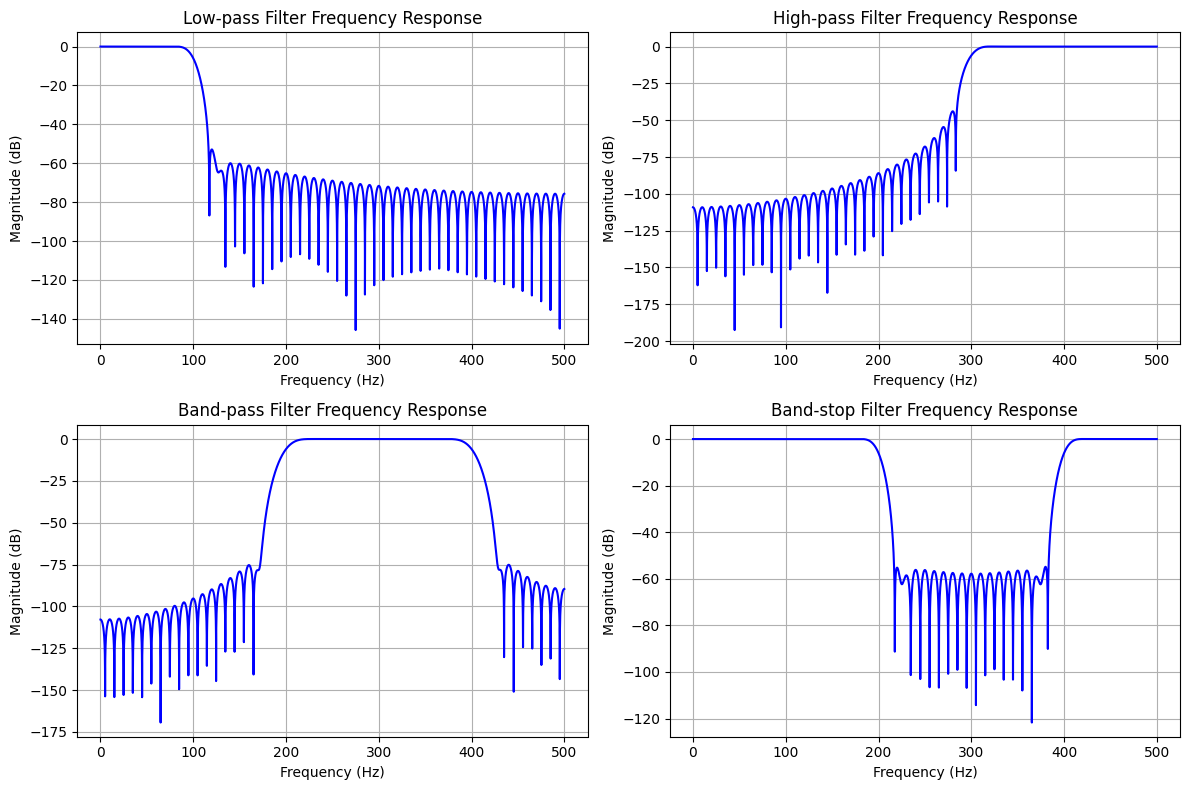

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Parameters
N = 101        # Filter length
Fs = 1000      # Sampling frequency (Hz)
low_cutoff = 100
high_cutoff = 300
band = [200, 400]

# Filter Design
lowpass = firwin(N, low_cutoff, window="hamming", fs=Fs)
highpass = firwin(N, high_cutoff, window="hann", pass_zero=False, fs=Fs)
bandpass = firwin(N, band, window="blackman", pass_zero=False, fs=Fs)
bandstop = firwin(N, band, window="hamming", pass_zero=True, fs=Fs)

# Plotting
filters = {
    "Low-pass": lowpass,
    "High-pass": highpass,
    "Band-pass": bandpass,
    "Band-stop": bandstop
}

plt.figure(figsize=(12, 8))
for i, (name, coeff) in enumerate(filters.items()):
    w, h = freqz(coeff, worN=8000, fs=Fs)
    plt.subplot(2, 2, i + 1)
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title(f"{name} Filter Frequency Response")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)

plt.tight_layout()
plt.show()


## FIR Filter Design using Frequency Sampling Technique

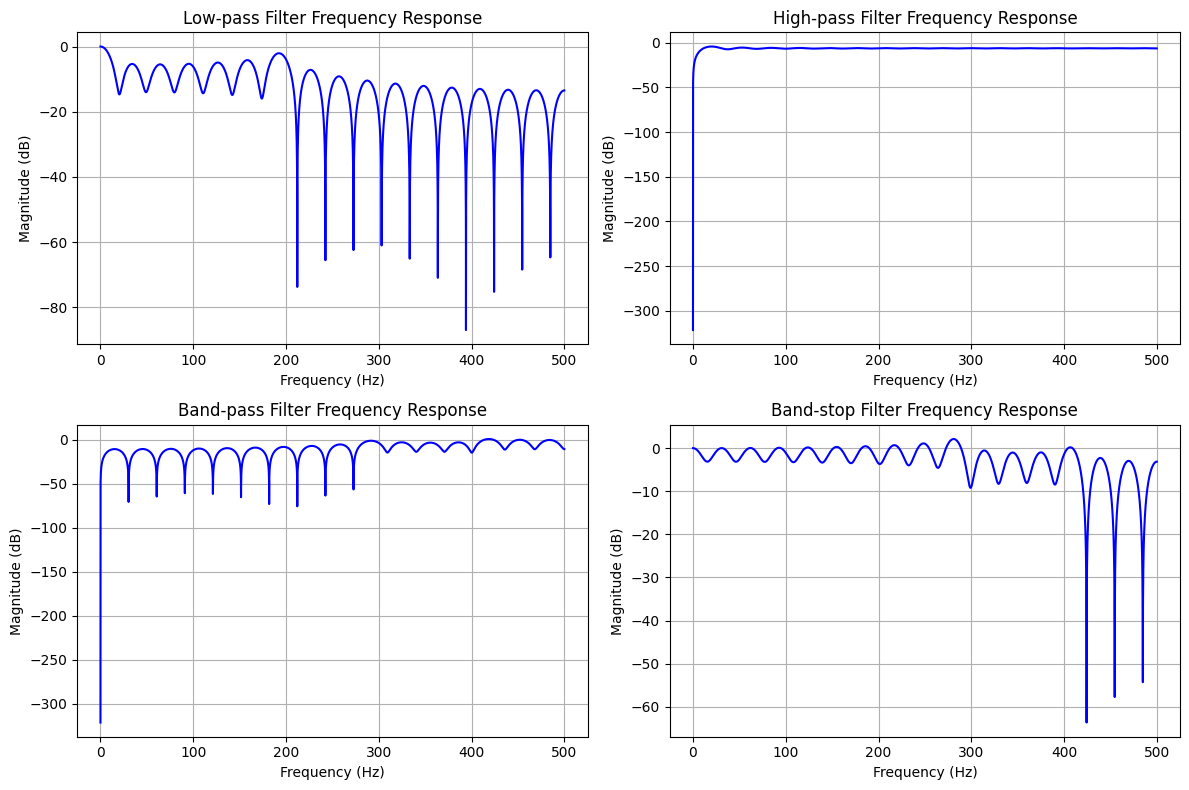

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft
from scipy.signal import freqz

def freq_sampling_design(Hd):
    h = np.real(ifft(Hd))
    return h

# Parameters
N = 33
Fs = 1000
frequencies = np.linspace(0, 1, N, endpoint=False)

# Frequency Response Samples
Hd_low = np.where(frequencies <= 0.2, 1, 0)
Hd_high = np.where(frequencies >= 0.5, 1, 0)
Hd_bandpass = np.where((frequencies >= 0.3) & (frequencies <= 0.6), 1, 0)
Hd_bandstop = np.where((frequencies >= 0.3) & (frequencies <= 0.6), 0, 1)

# Get Filter Coefficients
lowpass = freq_sampling_design(Hd_low)
highpass = freq_sampling_design(Hd_high)
bandpass = freq_sampling_design(Hd_bandpass)
bandstop = freq_sampling_design(Hd_bandstop)

# Plotting
filters = {
    "Low-pass": lowpass,
    "High-pass": highpass,
    "Band-pass": bandpass,
    "Band-stop": bandstop
}

plt.figure(figsize=(12, 8))
for i, (name, coeff) in enumerate(filters.items()):
    w, h = freqz(coeff, worN=8000, fs=Fs)
    plt.subplot(2, 2, i + 1)
    plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
    plt.title(f"{name} Filter Frequency Response")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)

plt.tight_layout()
plt.show()
